In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import glob #used for concatenating data
import os

#specifying the path for the csv's downloaded
path = r'/Users/marta/Documents_/Andrew_project/health_project/euro_stats'
#reading only csv files from the folder
filenames = glob.glob(os.path.join(path , "*.csv"))


dfs = [] #empty list of dataframes
for filename in filenames:
    df = pd.read_csv(filename, index_col = None, header = 0) # reading the dataframes one by one from the csv files
    #changing coded names into the cause name
    df['icd10'] = filename[len(path)+1:-8]
    dfs.append(df) #appending the individual csv files into the dfs list

#concatenate all data into one DataFrame
big_frame = pd.concat(dfs, axis = 0, ignore_index=True)
big_frame.rename(columns={"TIME_PERIOD":"year"}, inplace = True)

big_frame

,DATAFLOW,LAST UPDATE,freq,unit,age,icd10,sex,geo,year,OBS_VALUE,OBS_FLAG
0,ESTAT:TPS00125(1.0),13/04/2023 11:00,A,RT,TOTAL,accident,F,AT,2011,21.80,NaN
1,ESTAT:TPS00125(1.0),13/04/2023 11:00,A,RT,TOTAL,accident,F,AT,2012,23.19,NaN
2,ESTAT:TPS00125(1.0),13/04/2023 11:00,A,RT,TOTAL,accident,F,AT,2013,21.60,NaN
3,ESTAT:TPS00125(1.0),13/04/2023 11:00,A,RT,TOTAL,accident,F,AT,2014,21.58,NaN
4,ESTAT:TPS00125(1.0),13/04/2023 11:00,A,RT,TOTAL,accident,F,AT,2015,22.40,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13248,ESTAT:TPS00128(1.0),13/04/2023 11:00,A,RT,TOTAL,pneumonia,T,UK,2014,48.66,NaN
13249,ESTAT:TPS00128(1.0),13/04/2023 11:00,A,RT,TOTAL,pneumonia,T,UK,2015,53.77,NaN
13250,ESTAT:TPS00128(1.0),13/04/2023 11:00,A,RT,TOTAL,pneumonia,T,UK,2016,49.47,NaN
13251,ESTAT:TPS00128(1.0),13/04/2023 11:00,A,RT,TOTAL,pneumonia,T,UK,2017,48.08,NaN


In [3]:
#creating a dictionary for decoding the countries
country_decoding = {
    'AT':'Austria',
    'BE':'Belgium',
    'BG':'Bulgaria',
    'CH':'Switzerland',
    'CY':'Cyprus',
    'CZ':'Czechia',
    'DE':'Germany',
    'DK':'Denmark',
    'EE':'Estonia',
    'EL':'Greece',
    'ES':'Spain',
    'EU27_2020':'~idk~',
    'FI':'Finland',
    'FR':'France',
    'HR':'Croatia',
    'HU':'Hungary',
    'IE':'Ireland',
    'IS':'Iceland',
    'IT':'Italy',
    'LI':'Liechtenstein',
    'LT':'Lithuania',
    'LU':'Luxembourg',
    'LV':'Latvia',
    'MT':'Malta',
    'NL':'Netherlands',
    'NO':'Norway',
    'PL':'Poland',
    'PT':'Portugal',
    'RO':'Romania',
    'RS':'Serbia',
    'SE':'Sweden',
    'SI':'Slovenia',
    'SK':'Slovakia',
    'TR':'Turkiye',
    'UK':'United Kingdom',
}

big_frame['geo'] = big_frame['geo'].tolist()
print(big_frame['geo'])
big_frame['geo'] = big_frame['geo'].map(country_decoding)
big_frame = big_frame.sort_values('geo')
big_frame

0        AT
1        AT
2        AT
3        AT
4        AT
         ..
13248    UK
13249    UK
13250    UK
13251    UK
13252    UK
Name: geo, Length: 13253, dtype: object


,DATAFLOW,LAST UPDATE,freq,unit,age,icd10,sex,geo,year,OBS_VALUE,OBS_FLAG
0,ESTAT:TPS00125(1.0),13/04/2023 11:00,A,RT,TOTAL,accident,F,Austria,2011,21.80,NaN
10534,ESTAT:TPS00143(1.0),13/04/2023 11:00,A,RT,TOTAL,aids,M,Austria,2015,0.70,NaN
10533,ESTAT:TPS00143(1.0),13/04/2023 11:00,A,RT,TOTAL,aids,M,Austria,2014,0.80,NaN
10532,ESTAT:TPS00143(1.0),13/04/2023 11:00,A,RT,TOTAL,aids,M,Austria,2013,0.94,NaN
10531,ESTAT:TPS00143(1.0),13/04/2023 11:00,A,RT,TOTAL,aids,M,Austria,2012,0.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5855,ESTAT:TPS00116(1.0),13/04/2023 11:00,A,RT,TOTAL,cancer,T,~idk~,2012,266.32,NaN
5856,ESTAT:TPS00116(1.0),13/04/2023 11:00,A,RT,TOTAL,cancer,T,~idk~,2013,262.18,NaN
10332,ESTAT:TPS00143(1.0),13/04/2023 11:00,A,RT,TOTAL,aids,F,~idk~,2020,0.19,NaN
3210,ESTAT:TPS00149(1.0),13/04/2023 11:00,A,RT,TOTAL,drugs_dependence,F,~idk~,2011,0.13,NaN


In [4]:
country_mask = input('Pick the EU country you want to check:\n')
country_mask = (big_frame['geo'] == country_mask)
year_mask = int(input('Pick a year you want to check:\n'))
year_mask = (big_frame['year'] == year_mask)
sex_mask = input('Sex you want to check data for:\n')
sex_mask = (big_frame['sex'] == sex_mask)

filtered_big_frame = big_frame.loc[country_mask & year_mask & sex_mask]
filtered_big_frame

,DATAFLOW,LAST UPDATE,freq,unit,age,icd10,sex,geo,year,OBS_VALUE,OBS_FLAG
7054,ESTAT:TPS00134(1.0),13/04/2023 11:00,A,RT,TOTAL,nervous_sys,T,Poland,2020,23.35,NaN
2004,ESTAT:TPS00119(1.0),13/04/2023 11:00,A,RT,TOTAL,ischaemic,T,Poland,2020,120.60,NaN
6013,ESTAT:TPS00116(1.0),13/04/2023 11:00,A,RT,TOTAL,cancer,T,Poland,2020,280.15,NaN
3940,ESTAT:TPS00149(1.0),13/04/2023 11:00,A,RT,TOTAL,drugs_dependence,T,Poland,2020,0.05,NaN
9105,ESTAT:TPS00146(1.0),13/04/2023 11:00,A,RT,TOTAL,homicide,T,Poland,2020,0.58,NaN
4972,ESTAT:TPS00165(1.0),13/04/2023 11:00,A,RT,TOTAL,trasport,T,Poland,2020,9.89,NaN
10142,ESTAT:TPS00122(1.0),13/04/2023 11:00,A,RT,TOTAL,suicide,T,Poland,2020,11.92,NaN
13175,ESTAT:TPS00128(1.0),13/04/2023 11:00,A,RT,TOTAL,pneumonia,T,Poland,2020,59.32,NaN
8090,ESTAT:TPS00137(1.0),13/04/2023 11:00,A,RT,TOTAL,diabetes,T,Poland,2020,35.92,NaN
3043,ESTAT:TPS00131(1.0),13/04/2023 11:00,A,RT,TOTAL,liver,T,Poland,2020,21.45,NaN


In [5]:
top_3_values = filtered_big_frame.nlargest(3, 'OBS_VALUE')
print(top_3_values)

                  DATAFLOW       LAST UPDATE freq unit    age      icd10 sex  \
6013   ESTAT:TPS00116(1.0)  13/04/2023 11:00    A   RT  TOTAL     cancer   T   
2004   ESTAT:TPS00119(1.0)  13/04/2023 11:00    A   RT  TOTAL  ischaemic   T   
13175  ESTAT:TPS00128(1.0)  13/04/2023 11:00    A   RT  TOTAL  pneumonia   T   

          geo  year  OBS_VALUE OBS_FLAG  
6013   Poland  2020     280.15      NaN  
2004   Poland  2020     120.60      NaN  
13175  Poland  2020      59.32      NaN  


In [6]:
countries = big_frame['geo'].tolist()
countries = list(set(countries))
countries = sorted(countries, reverse = True)
countries

['~idk~',
 'United Kingdom',
 'Turkiye',
 'Switzerland',
 'Sweden',
 'Spain',
 'Slovenia',
 'Slovakia',
 'Serbia',
 'Romania',
 'Portugal',
 'Poland',
 'Norway',
 'Netherlands',
 'Malta',
 'Luxembourg',
 'Lithuania',
 'Liechtenstein',
 'Latvia',
 'Italy',
 'Ireland',
 'Iceland',
 'Hungary',
 'Greece',
 'Germany',
 'France',
 'Finland',
 'Estonia',
 'Denmark',
 'Czechia',
 'Cyprus',
 'Croatia',
 'Bulgaria',
 'Belgium',
 'Austria']

In [7]:
#trying to think of a generic structure for selecting the top 3 values for EACH country
year = 2020
year_mask = (big_frame['year'] == year)
sex = 'T'
sex_mask = (big_frame['sex'] == sex)

big_frame_filtered = big_frame.loc[
      year_mask   
    & sex_mask]
big_frame_filtered

# moze jednak napisac to wszystko w jednej tabeli
df = []
for country in countries:
    #if the position in geo column == country, then find top 3 values
    #country_mask = (big_frame['geo'] == country) #wrzucac conditionale od rzu do srodka, bo jest uzyta tylko raz, nie nadpisywac zmieniac nazy na df_sliced etc
    country_filtered = big_frame_filtered.loc[big_frame_filtered['geo'] == country]
    top_3_country = country_filtered.nlargest(3, 'OBS_VALUE') # mozna by bylo posortowac i wybrac pierwsze x values
    top_3_country['top_no'] = ['1', '2', '3']
    #print(top_3_country)
    #creating one big df with the top3 values for each countries
    df.append(top_3_country)
    
# concatenating all appended top_3 results onto a single df
df_final = pd.concat(df, axis = 0, ignore_index = True)
# ...with only these columns specified
df_final = df_final[['geo', 'icd10', 'OBS_VALUE', 'year', 'sex', 'top_no']].copy()
df_final.fillna("empty")
df_final = df_final.loc[(df_final.geo != "~idk~")]
df_final.dropna(inplace=True)

print(df_final)

             geo        icd10  OBS_VALUE    year sex top_no
9    Switzerland       cancer     196.59  2020.0   T      1
10   Switzerland    ischaemic      51.76  2020.0   T      2
11   Switzerland  nervous_sys      40.15  2020.0   T      3
12        Sweden       cancer     214.61  2020.0   T      1
13        Sweden    ischaemic      57.49  2020.0   T      2
..           ...          ...        ...     ...  ..    ...
100      Belgium  nervous_sys      46.60  2020.0   T      2
101      Belgium     accident      36.63  2020.0   T      3
102      Austria       cancer     230.98  2020.0   T      1
103      Austria    ischaemic      99.11  2020.0   T      2
104      Austria  nervous_sys      37.78  2020.0   T      3

[96 rows x 6 columns]


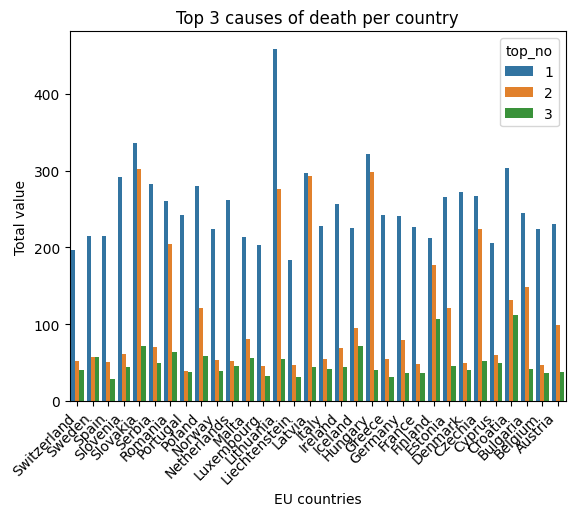

In [8]:
ax = sb.barplot( x = "geo",
            y = 'OBS_VALUE',
            hue = 'top_no',
            data = df_final)

#specfiy axis labels
ax.set(xlabel='EU countries',
       ylabel='Total value',
       title='Top 3 causes of death per country')
ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation=45, 
                   horizontalalignment='right',
                   fontweight = 'light',
                   )
plt.show()

96


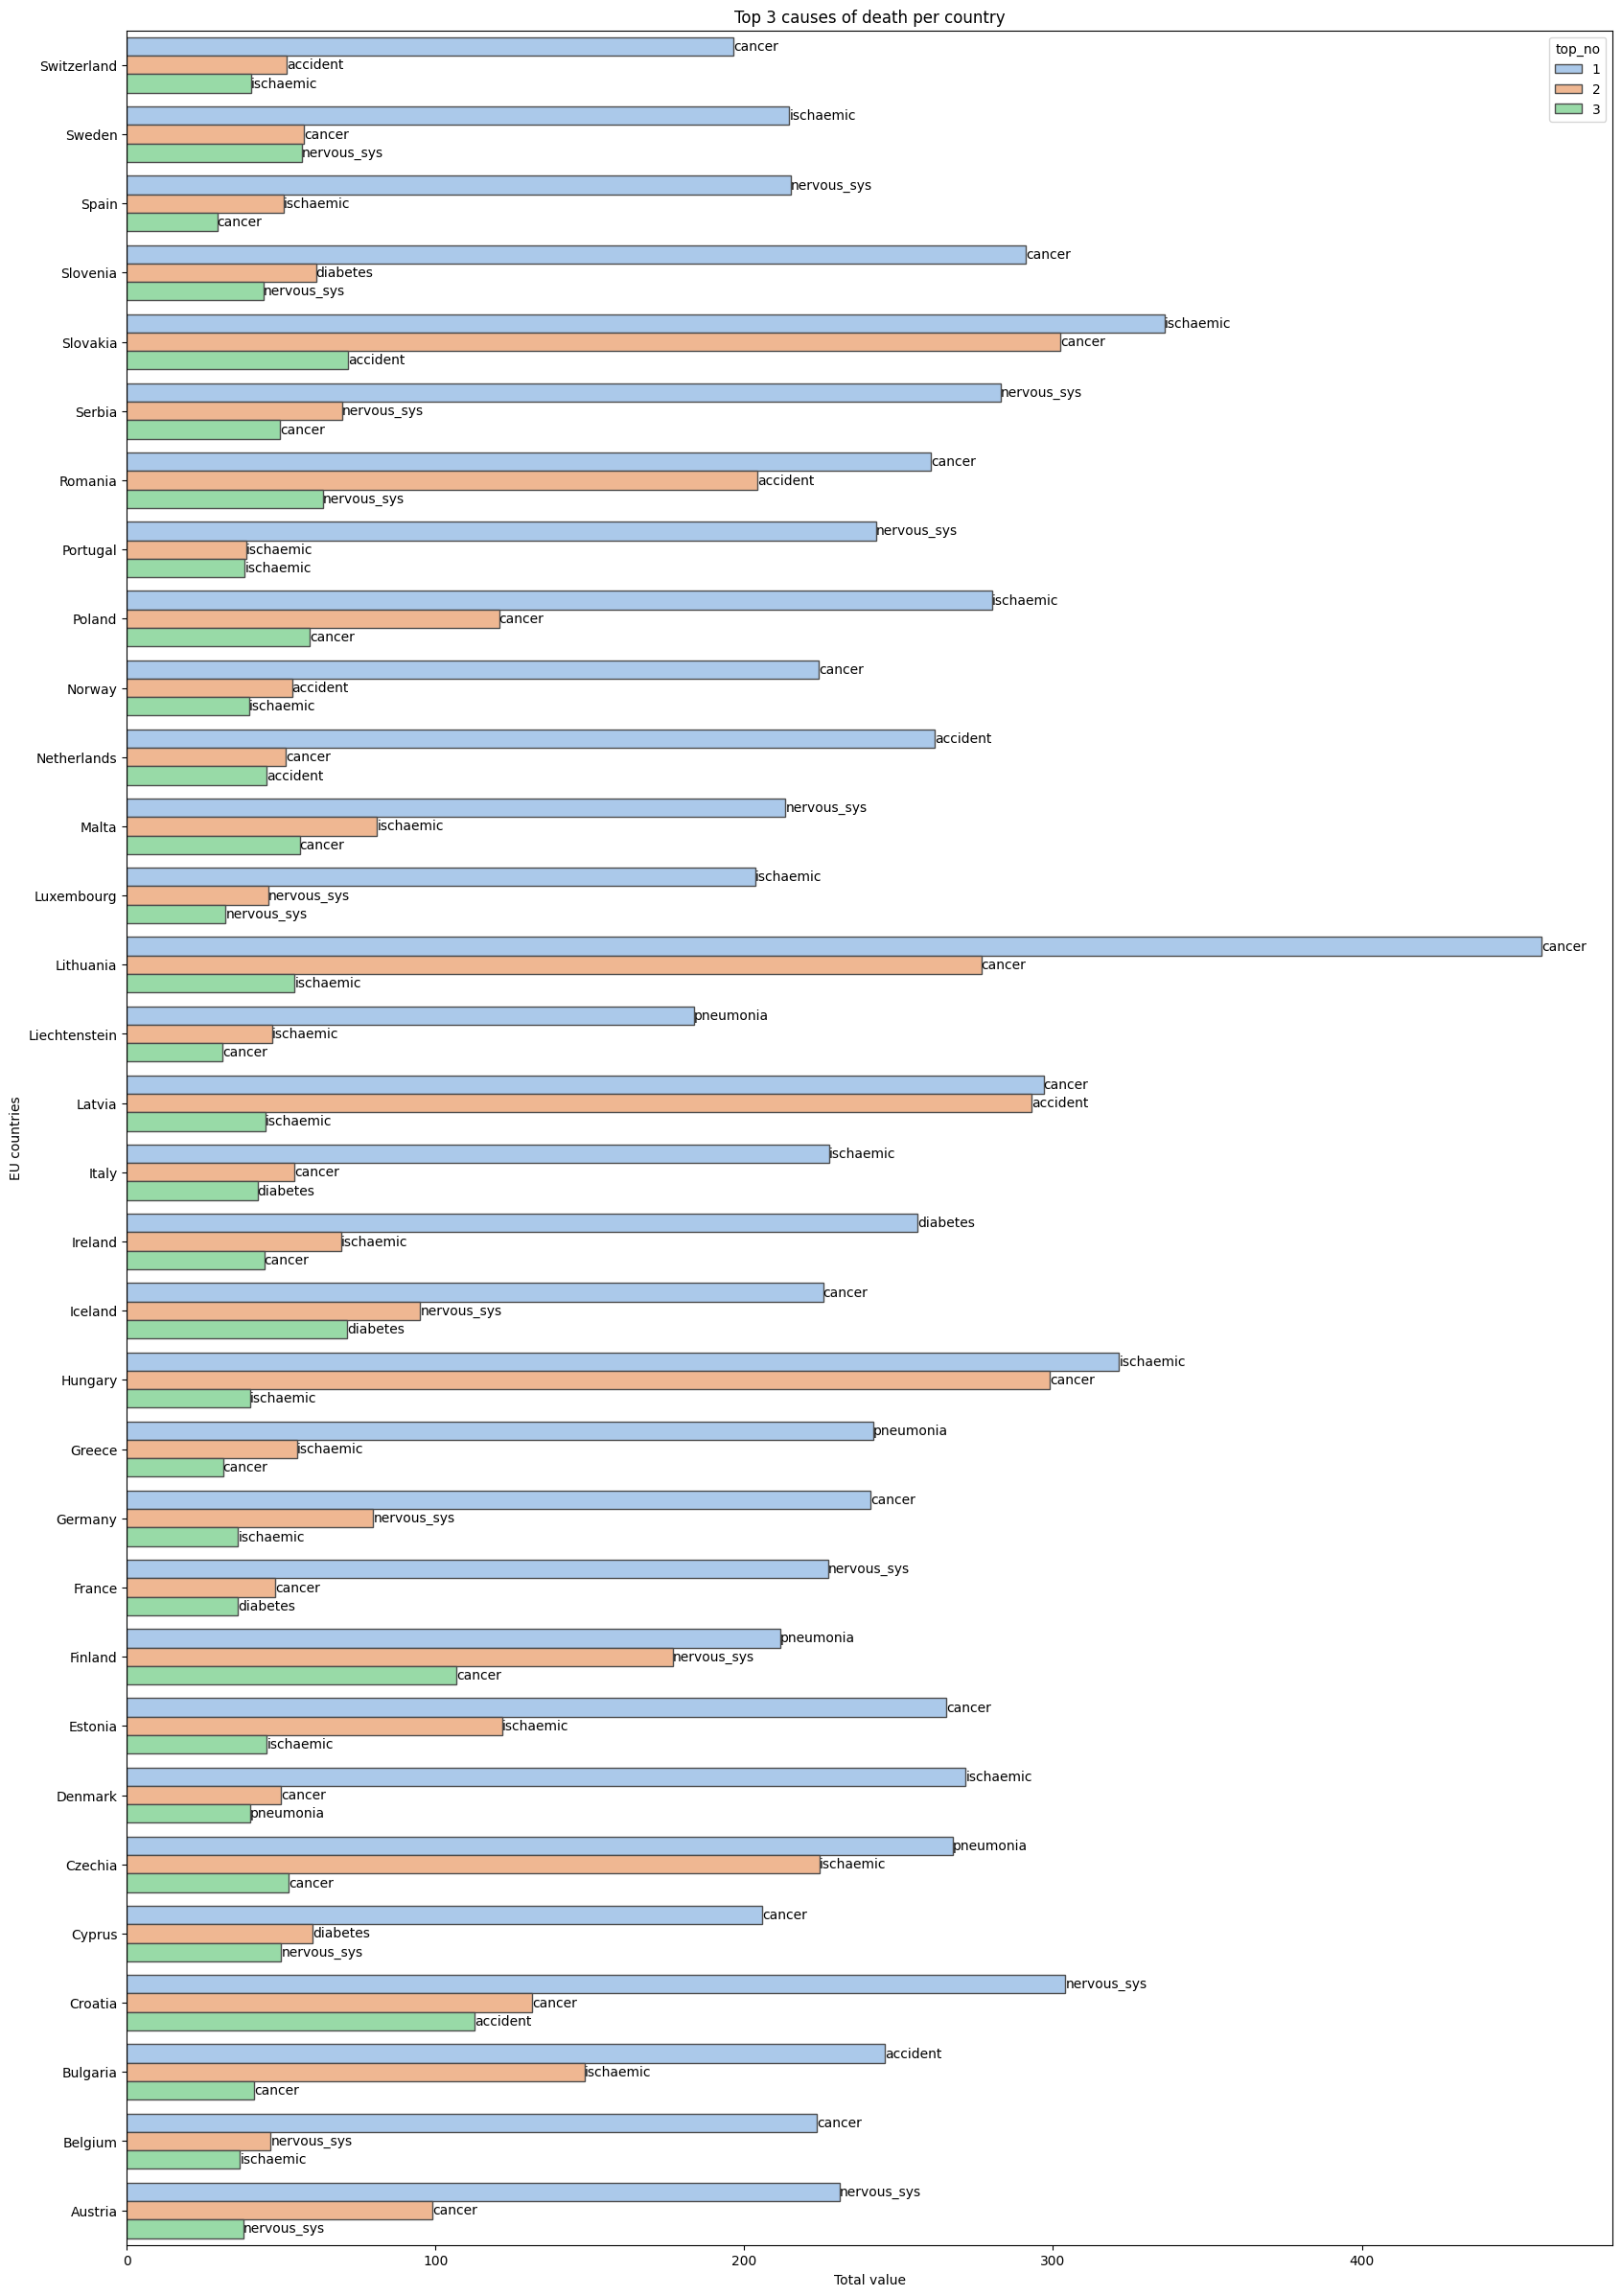

In [9]:
# trying to flip it horizontally
plt.figure(figsize=(20,30))

ax = sb.barplot(x = df_final.OBS_VALUE,
                y = df_final.geo,
                hue = df_final.top_no,
                orient = 'h',
                palette= "pastel",
                edgecolor = "0.3")

ax.set(ylabel= "EU countries",
       xlabel = "Total value",
       title = "Top 3 causes of death per country")

# # Adding numerical labels to the bars
# for p in ax.patches:
#     width = p.get_width()
#     print(width)
#     plt.text(width,  # Place the text at the end of the bar
#              p.get_y() + p.get_height() / 2,  # Vertical alignment
#              f'{width:.2f}',  # Format the text to your liking
#              ha="left",  # Horizontal alignment
#              va="center")  # Vertical alignment

# plt.show()

# Adding labels to the bars using df_final.icd10
length_df = len(df_final.top_no)
print(length_df)
for i, p in enumerate(ax.patches):
#     for i in range(length_df):
       # print(i)
       width = p.get_width()
       icd10_label = df_final.icd10.iloc[i]  # Get the corresponding icd10 value
       plt.text(width,  # Place the text at the end of the bar
              p.get_y() + p.get_height() / 2,  # Vertical alignment
              f'{icd10_label}',  # Use the icd10 value
              ha="left",  # Horizontal alignment
              va="center")  # Vertical alignment

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


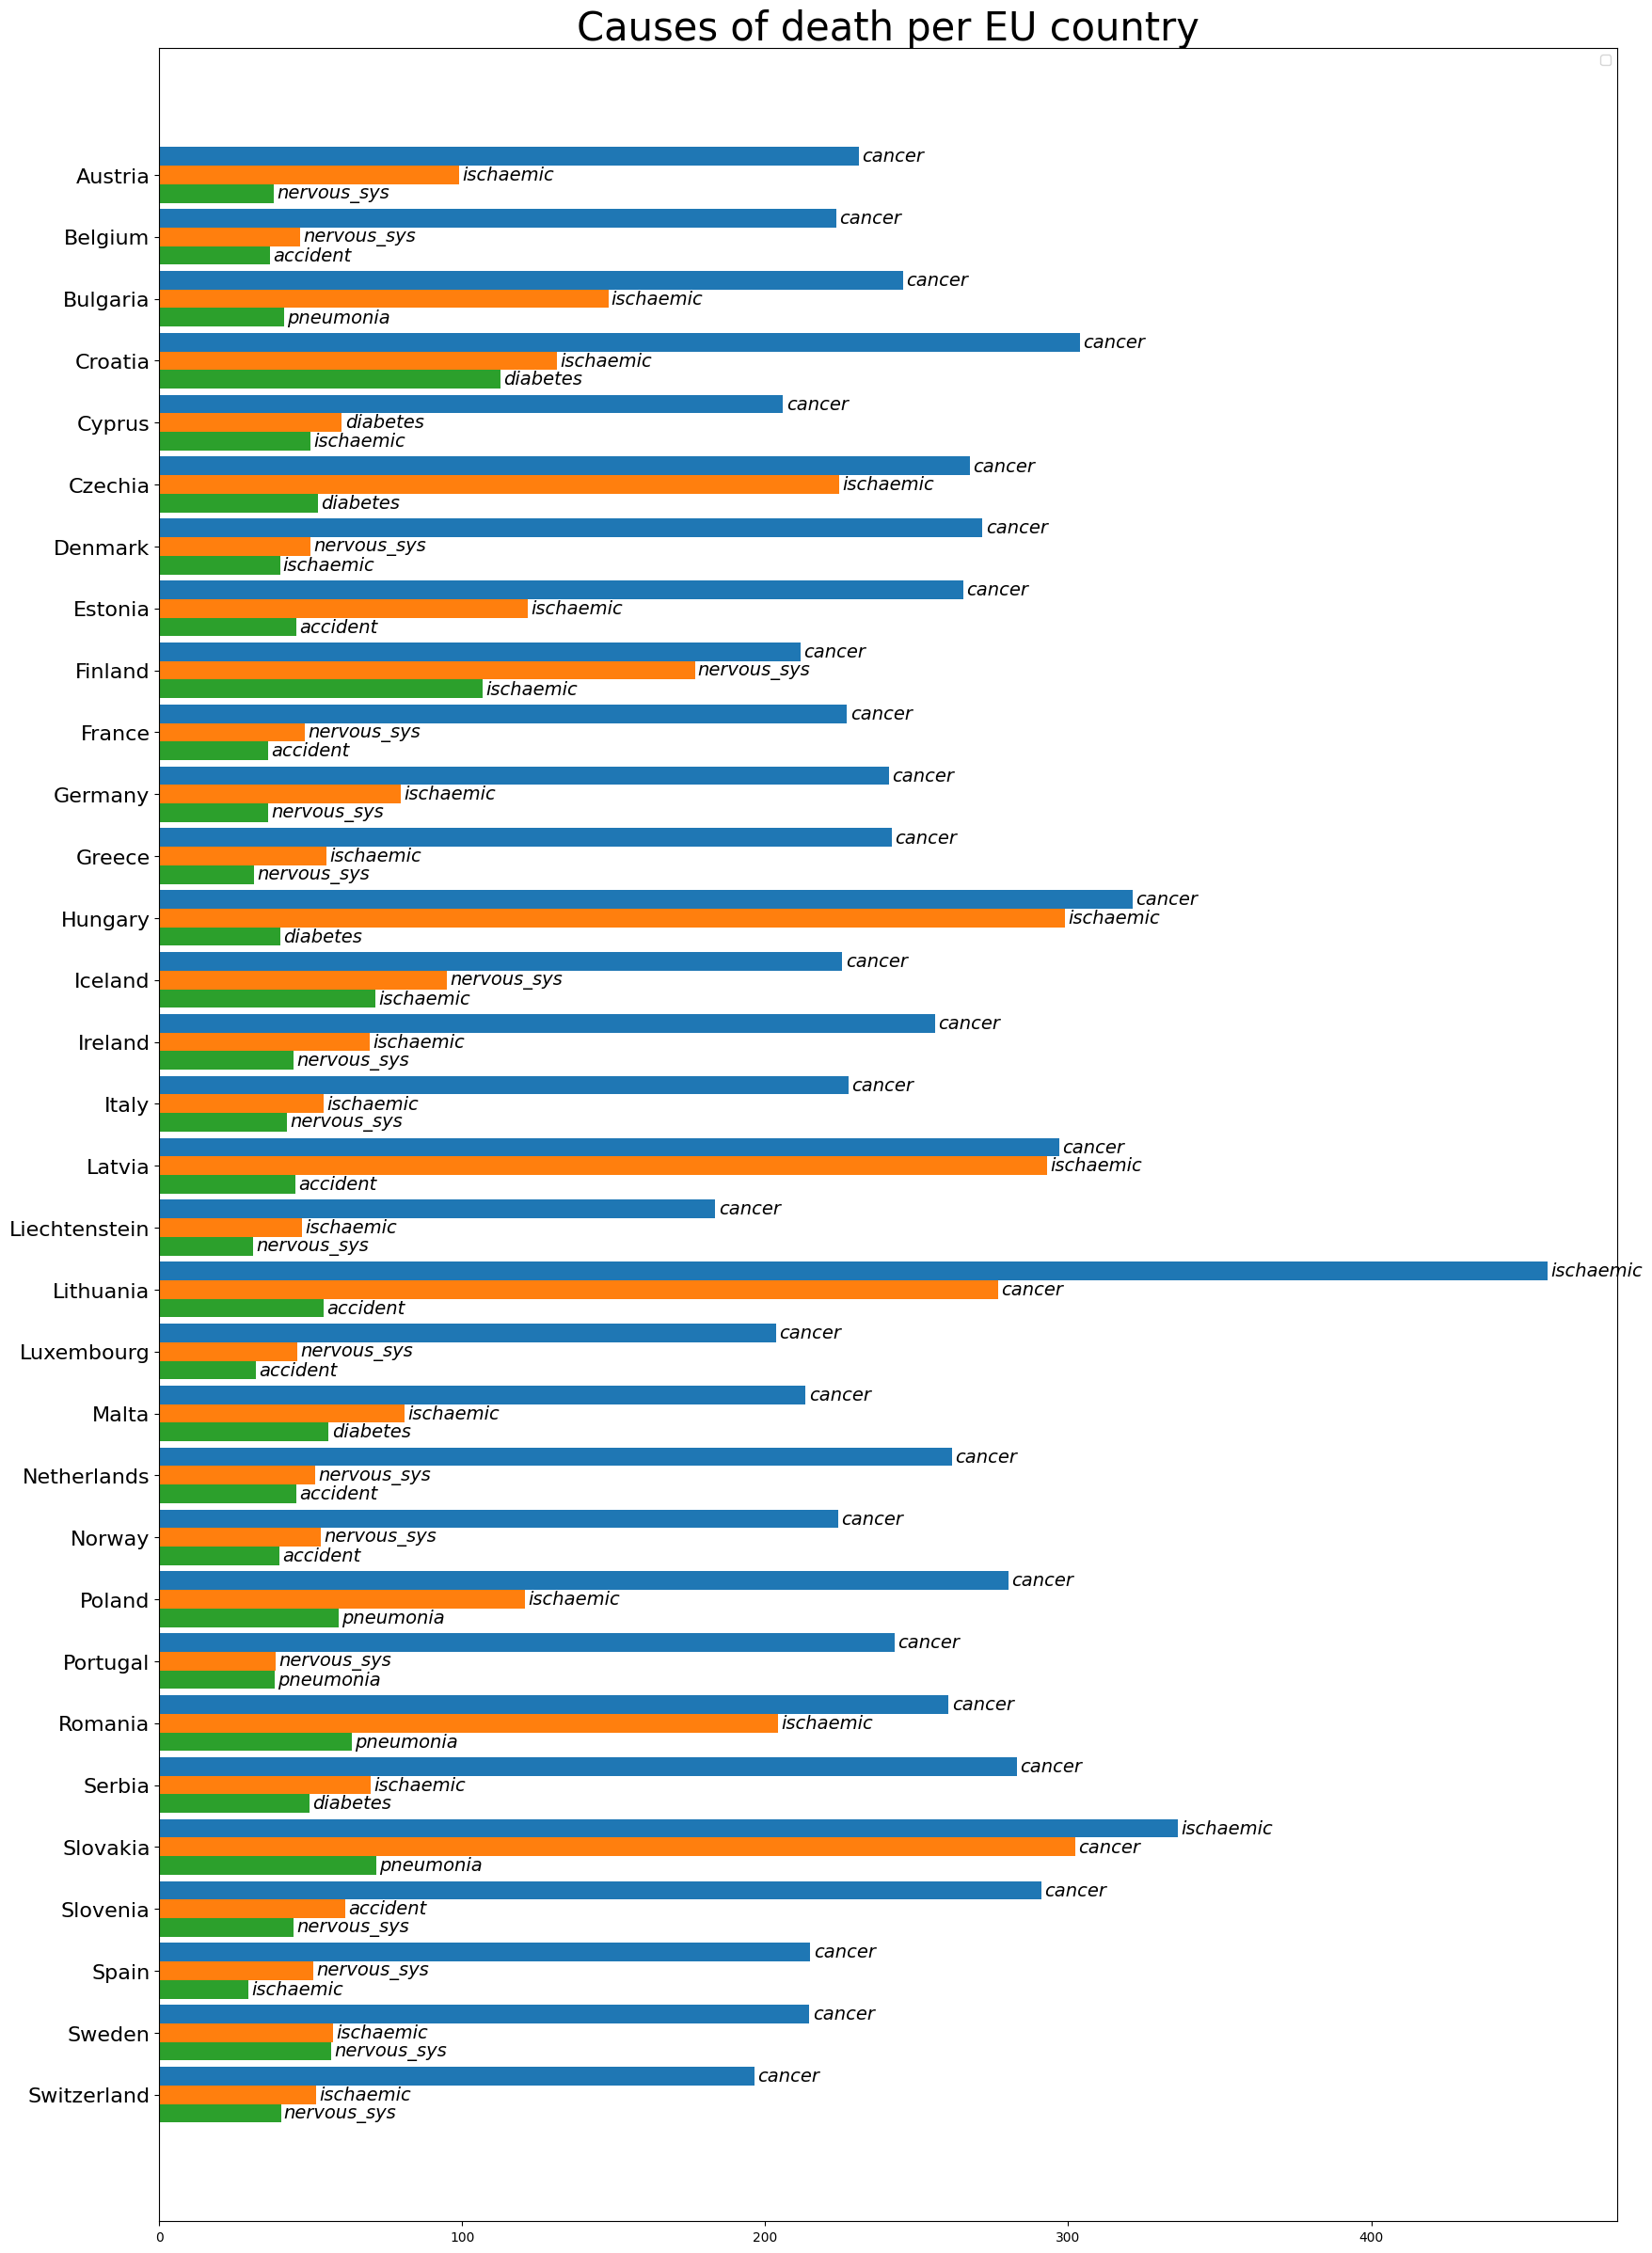

In [10]:
plt.figure(figsize=(20,30))
df_final.to_csv("/Users/marta/Documents_/Andrew_project/health_project/euro_stats/df_final.csv")
y = df_final.geo
x = df_final.OBS_VALUE

countries = df_final.geo.unique()
num_countries = len(countries)

y_axis = np.arange(num_countries)

first_causes = df_final.loc[df_final.top_no == '1']
second_causes = df_final.loc[df_final.top_no == '2']
third_causes = df_final.loc[df_final.top_no == '3']
bar_height = 0.3

plt.barh(y_axis + bar_height, first_causes.OBS_VALUE, height = bar_height)
plt.barh(y_axis, second_causes.OBS_VALUE, height = bar_height)
plt.barh(y_axis-bar_height, third_causes.OBS_VALUE, height = bar_height)

# Add labels to the bars using plt.text
for i in range(len(countries)):
    plt.text(first_causes.OBS_VALUE.iloc[i] + 1, i + bar_height, first_causes.icd10.iloc[i], va='center', fontsize=14, style = 'italic')
    plt.text(second_causes.OBS_VALUE.iloc[i] + 1, i, second_causes.icd10.iloc[i], va='center', fontsize=14, style = 'italic')
    plt.text(third_causes.OBS_VALUE.iloc[i] + 1, i - bar_height, third_causes.icd10.iloc[i], va='center', fontsize=14, style = 'italic')

plt.yticks(y_axis, countries, fontsize=16)
plt.title("Causes of death per EU country", fontsize=30)
plt.legend()
plt.show()

# sprawdzic czy to jest 200 na np 100,000 czy ogolna liczba w kraju
# wieksze odstepy abo pomyslec jak mozna sprawic zeby graph byl bardziej; moze grid dodac
# jakie sa glowne powody zachorowan na raka
# w tym rak a to tyle przypadkow a rak b to iles przypadkow, wiec najwiekszym zagrozeniem jest 
# sposrod tych top 3 powtarzajacym sie powodem smierci jest np zla dieta etc

# przetestowac 
# biblioteka - gradio